In [1]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from scipy import ndimage
import numpy as np

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
print("images_train= ", images_train.shape)
print("class_train= ", cls_train.shape)
print("label_train= ", labels_train.shape)

images_train=  (50000, 32, 32, 3)
class_train=  (50000,)
label_train=  (50000, 10)


In [17]:
x_images_training=images_train[:, :, :, 0]
x_train=x_images_training.reshape((50000, 32*32))
y_train=cls_train
print(x_train.shape)
print(y_train.shape)
print(x_images_training.shape)

(50000, 1024)
(50000,)
(50000, 32, 32)


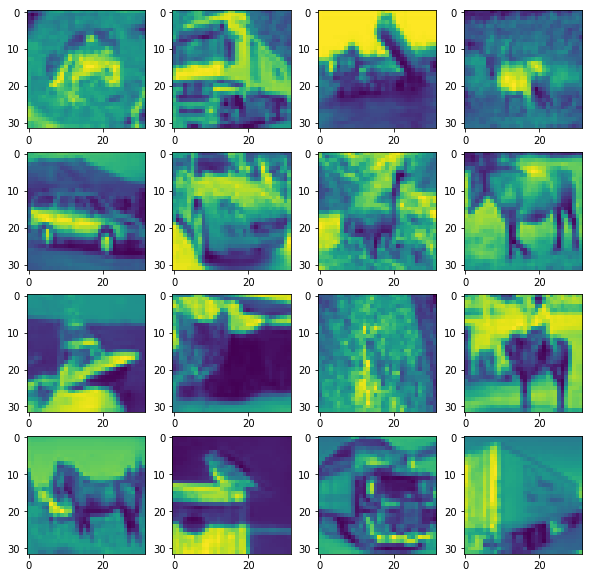

In [18]:
fig=plt.figure(figsize=(10, 10))
for i in range(16):
    ax=fig.add_subplot(4, 4, i+1)
    ax.imshow(x_images_training[i])
plt.show()

In [20]:
new_rotated=[]
for image in x_images_training:
    for angle in range(4, 30, 4):
        new_rotated.append(ndimage.rotate(image, angle, reshape=False, mode='nearest'))
new_rotated=np.array(new_rotated)
new_rotated.shape

(350000, 32, 32)

In [25]:
new_rotated=new_rotated.reshape(-1, 32*32)

In [ ]:
np.append(x_train, new_rotated, axis=0).shape

In [ ]:
fig=plt.figure(figsize=(16, 16))
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1)
    ax.imshow(new_rotated[i], cmap=plt.cm.bone)
plt.show()

In [ ]:
pca=PCA(whiten=True)
pca.fit(x_train)

In [ ]:
k=0
current=0
total=sum(pca.explained_variance_)
while current/total<0.99:
    current+=pca.explained_variance_[k]
    k+=1
k

In [ ]:
pca_cifar=PCA(n_components=k, whiten=True)
x_train_transformed=pca_cifar.fit_transform(x_train)

In [ ]:
x_train_transformed.shape

In [ ]:
print(images_test.shape)
print(cls_test.shape)
print(labels_test.shape)

In [ ]:
x_images_test=images_test[:, :, :, 1]
x_test=x_images_test.reshape((10000, 32*32))
y_test=cls_test
print(x_test.shape)
print(y_test.shape)
print(x_images_test.shape)

In [ ]:
x_test_transformed=pca_cifar.transform(x_test)

In [ ]:
x_test_transformed.shape

In [ ]:
clf=RandomForestClassifier(n_jobs=-1, n_estimators=101, max_depth=1000, verbose=1)
#Remove n_jobs parameter if it gives an error!
clf.fit(x_train_transformed, y_train)

In [ ]:
y_test_predicted=clf.predict(x_test_transformed)

In [ ]:
clf.score(x_test_transformed, y_test)

In [ ]:
dic=dict()
ans=[]
for i in range(len(class_names)):
    dic[i]=class_names[i]
for i in y_test_predicted:
    ans.append(dic[i])

In [ ]:
np.savetxt(fname="answers.csv", X=ans, delimiter=',', fmt="%s")